# PyTorch Workflow

Let's Explore a an exmaple PyTorch end-to-end workflow.


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:
what_we_were_covering = {1: "data (perpare and load)",
                        2: "Build model",
                        3: "Fitting the model to data (training)",
                        4: "Making predictions and evaulating a model (inference)",
                        5: "saving and loading a model",
                        6: "Putting it all toegthere"}

what_we_were_covering

{1: 'data (perpare and load)',
 2: 'Build model',
 3: 'Fitting the model to data (training)',
 4: 'Making predictions and evaulating a model (inference)',
 5: 'saving and loading a model',
 6: 'Putting it all toegthere'}

In [3]:
import torch
from torch import nn # nn contains all of Pytroch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'1.12.1'

## Data (Preparing and Loading)

Data can be almost anything... in machine learning.

* Excel spreadsheet
* Image of any kind
* Video
* Audio like songs or podcast
* DNA 
* Text

Machine learning is a game of two parts:

1. Get data into a numerical representation
2. Build model to learn those representation

To Showcase this, let's create some *known* data using the linear regression formula

we'll use linear regression formula to make a straight line with known **parameters.**

In [4]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create some data here
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
len(X), len(y)

(50, 50)

In [6]:
### Splitting data into training and test sets (one of the most important concepts in machine learning in genral)
train_split  = int(0.8 * len(X))
X_train, y_train = X[:train_split] , y[:train_split]
X_test, y_test = X[train_split:] , y[train_split:]

len(X_train) , len(X_test) , len(y_train), len(y_test)

(40, 10, 40, 10)

In [7]:
train_split

40

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, Visualize, Visualize!"

In [8]:
def plot_predictions(train_data = X_train,
                    train_label = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions=None):
    
    """
    Plots training data, test data and compares predictions
    """
    plt.figure(figsize=(7,5))

    # plot training data in blue
    plt.scatter(train_data, train_label, c='b', s=4, label='Training data')

    # plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')
 
    # Are these predictions?
    if predictions is not None:
        plt.scatter(test_data, predictions , c='r' , s=4 , label='Predictions')
    
    plt.legend(prop={'size': 14});
        

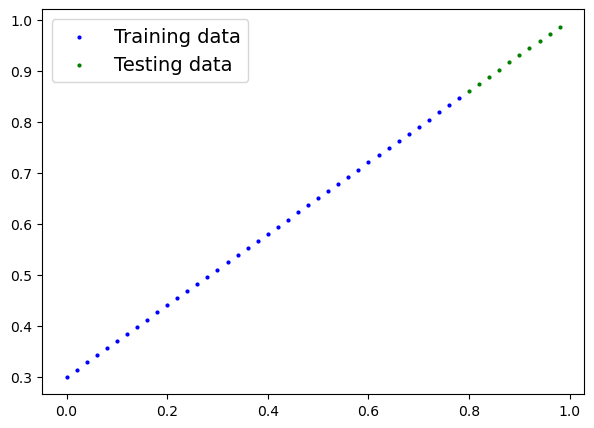

In [9]:
plot_predictions();

## 2. Build model

Our first Pytorch model!

This is very exciting...let's do it!

**What our model does:**
* Start with random Vales
* Look at training data and adjust the random values to better represent (or get closer to) the ideal vales (the weights & bias values we need to create we used to create the data)

**How does it do so?**

Through two main algorithim
1. Gradient Descent 
2. Backpropagtion

In [18]:
#create linear regression model class
from torch import nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    
    # forward method to define the computation in the model
    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.weights * x + self.bias # This is the linear regression

### Pytorch building essentials
* torch.nn - contains all of the buildings for computatinol graphs (a neural networks can be considered a computatinol graph)
* torch.nn.Parameters - what parameters should our model try and learn, often a Pytorch layer from torch.nn will set these for us
* torch.nn.Module - The Base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - This is where optimzer in pytorch live, they will help with gradient descent  
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

## Checking the content of our Pytorch model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using .parameters().

In [19]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [20]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [21]:
weight, bias

(0.7, 0.3)

## Making prediction using `torch.inference_mode()

To check our model's predictive power, let's see how well it predictive `y_test` based on `x_test`

When we pass data through our model, it's going to run it through the `forward` method.

In [22]:
with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

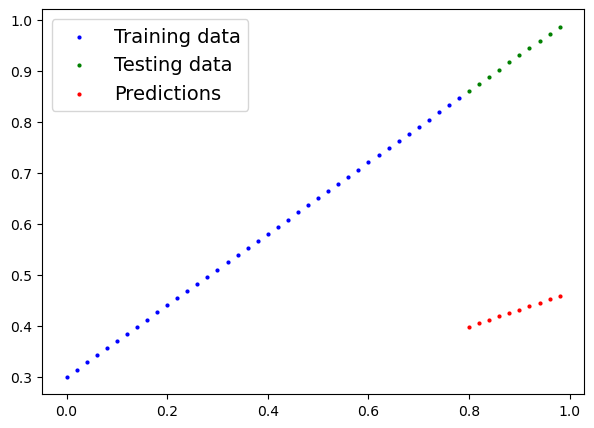

In [23]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknow* parameters (these may be random) to some *knows* parameters.

or in the other words from a poor representaion of the data to a better representation of the data.

one way to measure how poor or how wrong your models predictions are is to use a loss function

* Note loss function may also called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function

Things we need to train

* **Loss function:** A function to measure how wrong your model's predictions are to the to the ideal outputs. Lower is better

* **Optimizers.** Take into account the loss of a model and adjusts the models' parameters (e.g. weighs & bias)

In [24]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [25]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [26]:
# setup a loss function
loss_fn = nn.L1Loss()

#setup an optimzer
optimizer  = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [27]:
loss_fn

L1Loss()

### Building Training loop in Pytorch 

A couple to things we need in a training loop
0. Loop though the data
1. Forward Pass (this involves data moving thourgh our model's `forward()`
2. Calculate the loss (Compare the forward pass predictions to ground truth lables)
3. Optimzer zero grad
4. Loss Backward - move backward throgh the network to calculate the gradients of each parameter of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use optimzer to adjust our model parameters to try and improve the loss (**Gradient Descents**)

In [28]:
# An epoch is one loop through the data... (This is a hyperparameter because we've set it ourselves)
epochs = 200

epochs_count = []
loss_values = []
test_loss_values = []



# 0. Loop Thorugh the data
for epoch in range(epochs):
    #Set the model to training 
    model_0.train() #train mode in pytorch sets all parameters that require gradients to require gradients
    
    #1. Forward pass
    y_pred = model_0(X_train)
    
    #2. Calculate the loss
    loss = loss_fn(y_pred,y_train)
    
    #3. Optimizer Zero grad
    optimizer.zero_grad()
    
    #4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()
    
    #5. Step the optimizer (Perform gradient descent)
    optimizer.step()
    
    model_0.eval() #turns off different settings in the model not needed for evaluation/testing  (droptout/bath norm) layers)
    
    with torch.inference_mode():
        #1. Do the forward pass
        test_pred = model_0(X_test)
        
        #calculate the loss
        test_loss = loss_fn(test_pred, y_test)
    #print out what's happening
    if epoch % 10 == 0:
        epochs_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
        
        #print out the state dictionary
        print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [29]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.6990], requires_grad=True),
 Parameter containing:
 tensor([0.3093], requires_grad=True)]

In [30]:
with torch.inference_mode():
    y_pred_new = model_0(X_test)

In [31]:
y_pred_new

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

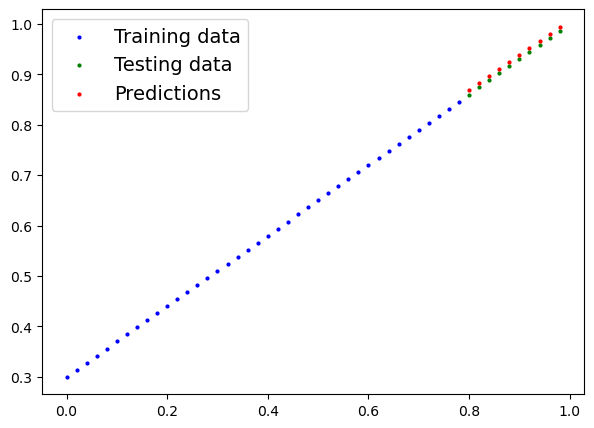

In [32]:
plot_predictions(predictions=y_pred_new)

In [33]:
# epochs_count
# loss_values
test_loss_values

[tensor(0.4811),
 tensor(0.3464),
 tensor(0.2173),
 tensor(0.1446),
 tensor(0.1136),
 tensor(0.0992),
 tensor(0.0889),
 tensor(0.0806),
 tensor(0.0723),
 tensor(0.0647),
 tensor(0.0565),
 tensor(0.0482),
 tensor(0.0406),
 tensor(0.0323),
 tensor(0.0241),
 tensor(0.0165),
 tensor(0.0082),
 tensor(0.0050),
 tensor(0.0050),
 tensor(0.0050)]

In [34]:
np.array(torch.tensor(loss_values).numpy())

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
       0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
       0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
      dtype=float32)

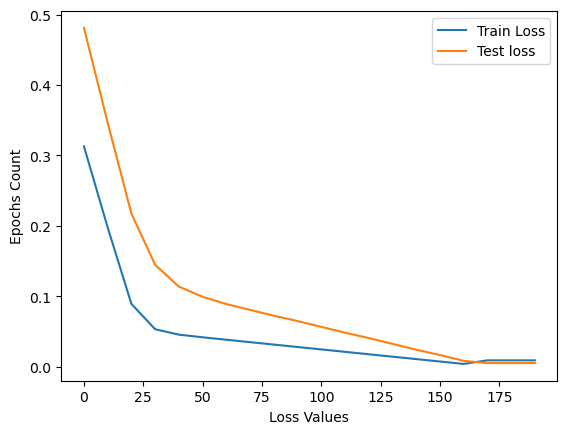

In [35]:
plt.plot(epochs_count, np.array(torch.tensor(loss_values).numpy()), label = 'Train Loss')
plt.plot(epochs_count, test_loss_values, label = 'Test loss')
plt.xlabel('Loss Values')
plt.ylabel('Epochs Count')
plt.legend()
plt.show()

In [36]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

### There are three method which we can use to save and load model in pytorch

1. `torch.save()` allow you to save a PyTorch object into pickle format

2. `torch.load()` allow you load a saved PyTorch object 

3. `torch.nn.Module.load_state_dict`  - this allow to load a model's saved state dicitionary

In [37]:
#Saving Pytorch Model
from pathlib import Path

# Create model dirctory
MODEL_PATH =  Path("model")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict 
print(f"Saving model to {MODEL_SAVE_PATH }")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to model\01_pytorch_workflow_model_0.pth


### Loading Model

In [38]:
loaded_model = LinearRegressionModel()

In [39]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])

In [40]:
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [41]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [42]:
loaded_model.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)
    
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

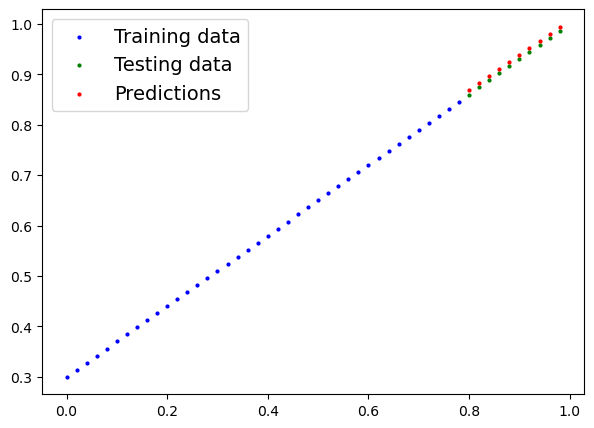

In [43]:
plot_predictions(predictions=loaded_model_preds)

## 6. Putting it all together

In [10]:
# importing libraries
import torch
from torch import nn
import matplotlib.pyplot as plt

##### creating device agnostic code.
That's mean if our code will get gpu it will use gpu do fast computation. othewise it will run on cpu.

In [11]:
device = 'cuda'if torch.cuda.is_available() else 'CPU'
print(f"Usind Device {device}")

Usind Device CPU


In [12]:
# Create some data using linear regresstion fromulat y = m*x + c
weight = 0.7
bias = 0.3

#Create range values
start = 0
end = 1
step = 0.02

#Create X and y (features and available)
X = torch.arange(start,end,step).unsqueeze(dim=1) #without unsqueeze errors will pop up
y  =  weight * X +  bias
X[:10] , y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [13]:
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split] , y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]
len(X_train) , len(X_test) , len(y_train) ,  len(y_test)


(40, 10, 40, 10)

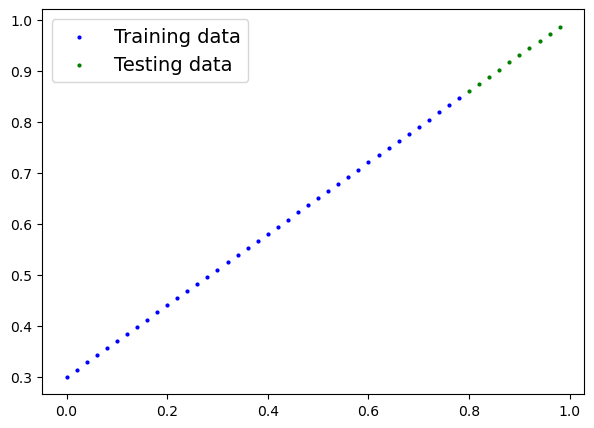

In [14]:
#Plot the Data
#Note: if you don't have the plot_prediction() function loaded, this will give error
plot_predictions(X_train, y_train, X_test, y_test)

In [15]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        #Use nn.Linear() for creating the model parameter / also called: linear transformer , probing lyaer, fully connected layer
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

                                 
#set the manual feed 
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1 , model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

### Training

For training we need

* Loss Function
* Optimizer
* Training Loop
* Testing Loop


In [16]:
# Setup the loss function
loss_fn = nn.L1Loss()

#setup the optmizer
optimizer = torch.optim.SGD( params=model_1.parameters()   ,lr=0.01)


In [17]:
#lets write a training and testing loop
torch.manual_seed(42)
epochs = 200

for epoch in range(epochs):
    
    model_1.train()
    
    #1.Forward Pass
    y_pred = model_1(X_train)
    
    #2.calculate the loss
    loss = loss_fn(y_pred, y_train)
    
    #3. Optimizer grad
    optimizer.zero_grad()
    
    #4. Perform backpropgation
    loss.backward()
    
    #5. The Optimzer Step
    optimizer.step()
    
    # Testing
    model_1.eval()
    
    with torch.inference_mode():
        test_pred = model_1(X_test)
        
        test_loss = loss_fn(test_pred, y_test)
        
    #print out what's happening
    if epoch % 10 == 0:
        print(f"Epochs: {epoch}, Loss: {loss}, Test Loss {test_loss}")
        
    

Epochs: 0, Loss: 0.5551779866218567, Test Loss 0.5739762187004089
Epochs: 10, Loss: 0.4399680495262146, Test Loss 0.4392663538455963
Epochs: 20, Loss: 0.3247582018375397, Test Loss 0.30455657839775085
Epochs: 30, Loss: 0.20954827964305878, Test Loss 0.16984674334526062
Epochs: 40, Loss: 0.09433844685554504, Test Loss 0.03513689711689949
Epochs: 50, Loss: 0.023886386305093765, Test Loss 0.04784906655550003
Epochs: 60, Loss: 0.0199567973613739, Test Loss 0.04580312222242355
Epochs: 70, Loss: 0.016517987474799156, Test Loss 0.0375305712223053
Epochs: 80, Loss: 0.013089170679450035, Test Loss 0.029944902285933495
Epochs: 90, Loss: 0.009653178043663502, Test Loss 0.02167237363755703
Epochs: 100, Loss: 0.006215679459273815, Test Loss 0.014086711220443249
Epochs: 110, Loss: 0.002787243574857712, Test Loss 0.005814164876937866
Epochs: 120, Loss: 0.0012645035749301314, Test Loss 0.013801807537674904
Epochs: 130, Loss: 0.0012645035749301314, Test Loss 0.013801807537674904
Epochs: 140, Loss: 0.00

In [18]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

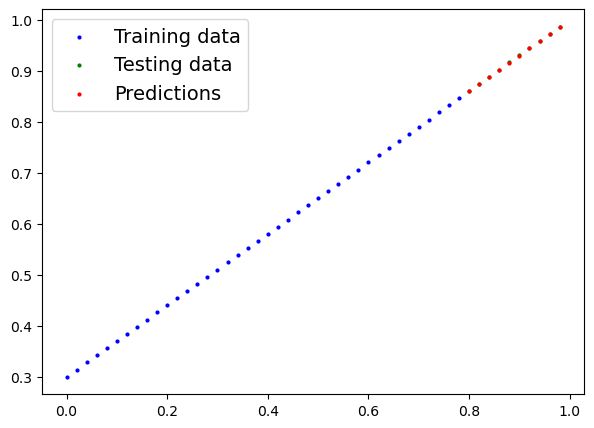

In [19]:
plot_predictions(predictions=test_pred)

### Saving and Loading Trained Model

In [28]:
from pathlib import Path

#1. Create model Directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. create model save path
MODEL_NAME = "01_Pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH 
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

In [29]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [30]:
#load a pytorch model
loaded_model_1  = LinearRegressionModelV2()

#load the saved model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


<All keys matched successfully>

In [31]:
loaded_model_1

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [32]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [36]:
# Evaluate the loaded model

loaded_model_1.eval()

with torch.inference_mode():
    loaded_model_1_pred = loaded_model_1(X_test)
    
test_pred == loaded_model_1_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])